In [31]:
%matplotlib inline
from context import spew
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
from matplotlib.colors import LogNorm
import matplotlib.ticker as ticker
import matplotlib.pylab as pl
import matplotlib.colors as mcolors
plt.style.use('seaborn-whitegrid')

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [32]:
filename = '../../data/ceroNegro_GITHUB.txt'
# filename = '../data/plume_height_trial_7/plume_height_trial_22000.txt'
eruption = spew.core.eruption.Eruption(data=filename, vent=Point(0, 0), test=False)

In [33]:
display(eruption.df)

,Easting,Northing,Elevation,MassArea,"[-4,-3.2)","[-3.2,-2.4)","[-2.4,-1.6)","[-1.6,-0.8)","[-0.8,0)","[0,0.8)","[0.8,1.6)","[1.6,2.4)","[2.4,3.2)","[3.2,4)",geometry,radius
0,510000,1389800,0,1.689990e-10,3.594500e-193,1.356970e-153,1.045890e-117,2.403550e-86,1.274470e-61,1.463030e-32,1.373690e-09,96.32730,3.670440e+00,0.002290,POINT (510000 1389800),1.480420e+06
1,510200,1389800,0,2.092370e-10,8.041390e-190,7.223320e-151,1.498970e-115,1.079550e-84,2.253710e-60,8.253400e-32,2.812850e-09,97.68320,2.314810e+00,0.002038,POINT (510200 1389800),1.480489e+06
2,510400,1389800,0,2.576260e-10,1.674780e-186,3.624400e-148,2.048280e-113,4.669860e-83,3.869320e-59,4.565260e-31,5.696450e-09,98.54050,1.457670e+00,0.001822,POINT (510400 1389800),1.480558e+06
3,510600,1389800,0,3.148380e-10,3.253670e-183,1.717630e-145,2.673860e-111,1.949380e-81,6.462390e-58,2.480890e-30,1.143190e-08,99.08000,9.183480e-01,0.001640,POINT (510600 1389800),1.480627e+06
4,510800,1389800,0,3.814070e-10,5.903710e-180,7.697730e-143,3.338760e-109,7.862470e-80,1.051270e-56,1.326170e-29,2.276270e-08,99.41900,5.795540e-01,0.001488,POINT (510800 1389800),1.480696e+06
5,511000,1389800,0,4.576750e-10,1.001270e-176,3.264950e-140,3.990900e-107,3.066450e-78,1.667030e-55,6.978760e-29,4.500490e-08,99.63200,3.666560e-01,0.001362,POINT (511000 1389800),1.480765e+06
6,511200,1389800,0,5.437250e-10,1.588070e-173,1.311260e-137,4.568910e-105,1.157020e-76,2.578020e-54,3.617070e-28,8.839690e-08,99.76610,2.326570e-01,0.001259,POINT (511200 1389800),1.480834e+06
7,511400,1389800,0,6.393240e-10,2.356210e-170,4.988130e-135,5.011280e-103,4.224870e-75,3.889380e-53,1.847000e-27,1.725390e-07,99.85070,1.481150e-01,0.001175,POINT (511400 1389800),1.480903e+06
8,511600,1389800,0,7.438720e-10,3.270970e-167,1.797690e-132,5.267080e-101,1.493270e-73,5.725480e-52,9.293880e-27,3.347290e-07,99.90430,9.462380e-02,0.001107,POINT (511600 1389800),1.480972e+06
9,511800,1389800,0,8.563580e-10,4.249260e-164,6.138720e-130,5.305600e-99,5.109420e-72,8.225010e-51,4.608910e-26,6.455160e-07,99.93830,6.067100e-02,0.001053,POINT (511800 1389800),1.481041e+06


In [34]:
def sample(df, n, weight="MassArea", alpha=0.5):
    weights = df[weight].copy() # Get values to be used as weights
    weights = weights**(alpha) # Apply scaling factor as w^alpha
    probs = weights/np.sum(weights) # Normalise to sum up to one
    chosen = np.random.choice(eruption.df.index, n, replace=False, p=probs) # Randomly choose n points
    return df.iloc[chosen]

c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


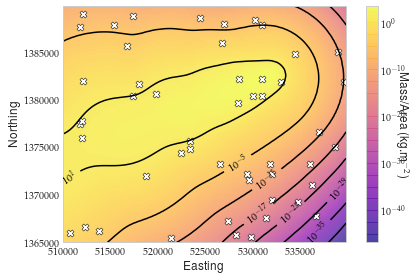

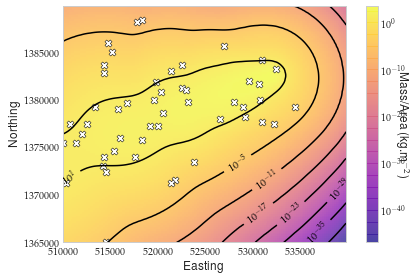

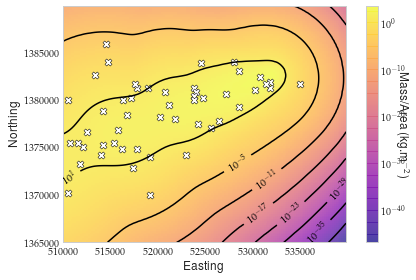

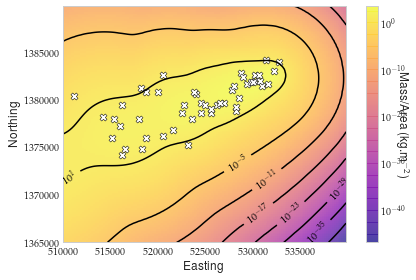

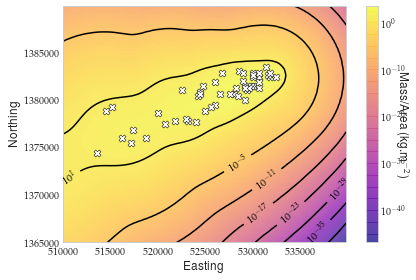

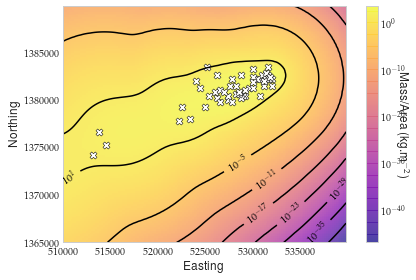

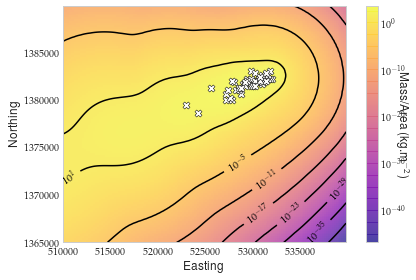

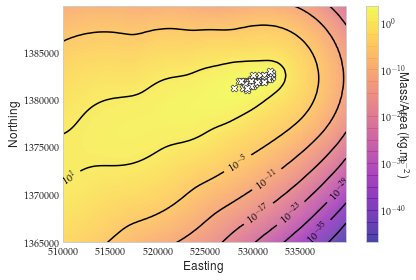

In [64]:
for i, a in enumerate([0, 0.1, 0.25, 0.5, 0.75, 1, 2, 5]):
#     fig, ax = plt.subplots(1, 1)
    fig, ax =  eruption.plot_contour(background='gradient', cmap="plasma", line_colors = "k",
                                     cbar_label="Mass/Area (kg.m$^{-2}$)", title="")
    
    
#     ax.axis("equal")
    piv = eruption.df.pivot(index="Northing", columns="Easting", values="MassArea")
    samp = sample(eruption.df, 50, alpha = a)
    samp.plot(ax=ax, facecolor='w', marker='X', edgecolor="k", markersize=50)
    
#     fmt = ticker.LogFormatterMathtext()
#     fmt.create_dummy_axis()
#     ax.clabel(c2, c2.levels, fmt=fmt)
    plt.grid(False)
    fig.gca().set_xlim(right=piv.columns.max(), left=piv.columns.min())
    fig.gca().set_ylim(bottom=piv.index.min(), top=piv.index.max())
    plt.tight_layout()
    plt.savefig("Alpha_%s.pdf"%str(i), dpi=200, format='pdf')

In [28]:
plt.cmap.red

AttributeError: module 'matplotlib.pyplot' has no attribute 'cmap'

In [23]:
dir(pl.cm.inferno)


['N',
 '__call__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_i_bad',
 '_i_over',
 '_i_under',
 '_init',
 '_isinit',
 '_lut',
 '_resample',
 '_rgba_bad',
 '_rgba_over',
 '_rgba_under',
 '_set_extremes',
 'colorbar_extend',
 'colors',
 'is_gray',
 'monochrome',
 'name',
 'reversed',
 'set_bad',
 'set_over',
 'set_under']